In [3]:
import os
from pathlib import Path
from time import strftime

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import auc, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
# Generate some example data (replace this with your actual data)
X, y = np.random.rand(1000, 10), np.random.randint(2, size=(1000,))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7/7 [==============================] - 0s 939us/step


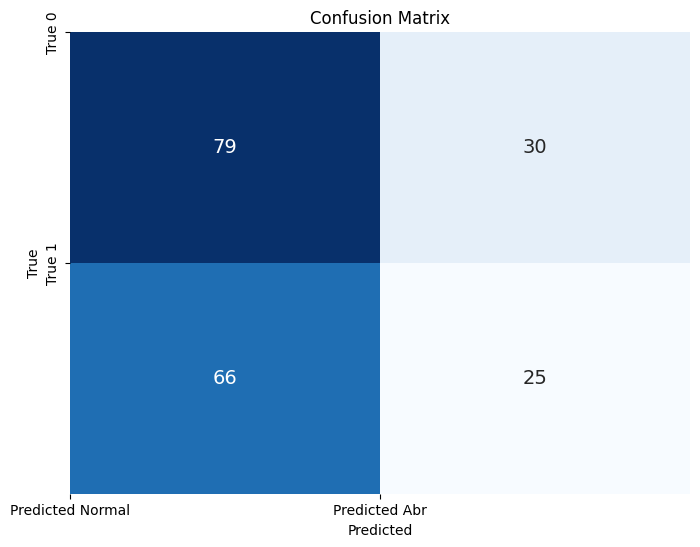

In [8]:
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5, save_path=None):
    """
    Generate and plot the confusion matrix for a TensorFlow model.

    Parameters:
    - model: The trained TensorFlow model.
    - X_test: Test features.
    - y_test: True labels for the test set.
    - threshold: Decision threshold for binary classification.
    - save_path: Optional path to save the plot as an image.

    Returns:
    - None
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Apply threshold for binary classification
    y_pred_binary = (y_pred > threshold).astype(int)

    # For binary classification, flatten the true labels
    y_test = np.reshape(y_test, (-1,))

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['Predicted Normal', 'Predicted Abr'])
    plt.yticks([0, 1], ['True 0', 'True 1'])
    plt.show()

    return cm

# Example usage:
# Assuming you have a trained model, test data (X_test, y_test), and a directory to save the plot
# Replace placeholders with your actual data and paths

# Build a simple binary classification model (replace this with your actual model)
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (replace this with your actual training process)
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

save_directory = "path/to/save/directory"

# Call the function to generate and save the confusion matrix
anw = plot_confusion_matrix(model, X_test, y_test, save_path=f"{save_directory}/confusion_matrix.png")

In [6]:
anw

array([[101,   8],
       [ 68,  23]])

Epoch 1/10
25/25 [==============================] - 2s 23ms/step - loss: 0.6976 - accuracy: 0.5188 - val_loss: 0.7043 - val_accuracy: 0.3650
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5462 - val_loss: 0.7046 - val_accuracy: 0.4050
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5575 - val_loss: 0.7025 - val_accuracy: 0.4450
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.5550 - val_loss: 0.7036 - val_accuracy: 0.4300
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.5713 - val_loss: 0.7053 - val_accuracy: 0.4300
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.5900 - val_loss: 0.7054 - val_accuracy: 0.4350
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.5775 - val_loss: 0.7060 - val_accuracy: 0.4400
Epoch 8/10
25/25 [=

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/save/directory/precision_recall_curve.png'

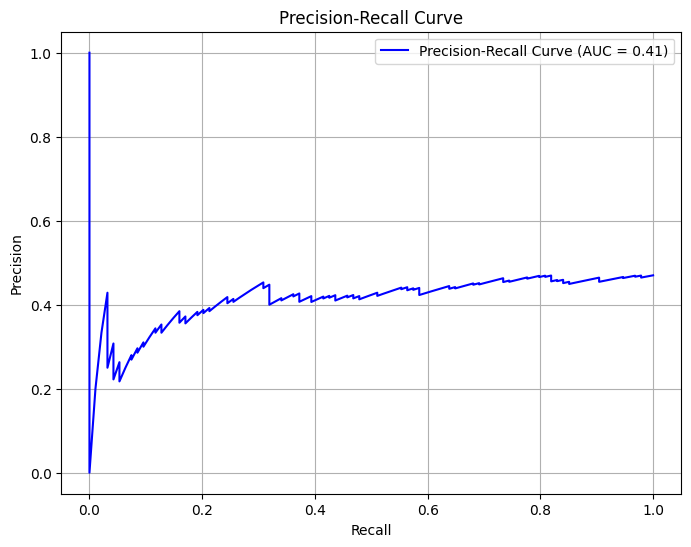

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def plot_precision_recall_curve(model, X_test, y_test, save_path=None):
    """
    Generate and plot the precision-recall curve for a TensorFlow model.

    Parameters:
    - model: The trained TensorFlow model.
    - X_test: Test features.
    - y_test: True labels for the test set.
    - save_path: Optional path to save the plot as an image.

    Returns:
    - None
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # For binary classification, flatten the true labels
    y_test = np.reshape(y_test, (-1,))
    y_pred = np.reshape(y_pred, (-1,))

    # Calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    # Calculate the area under the precision-recall curve
    auc_score = auc(recall, precision)

    # Plot the precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
        print(f"Precision-Recall Curve saved at: {save_path}")
    else:
        plt.show()

# Generate some example data (replace this with your actual data)
X, y = np.random.rand(1000, 10), np.random.randint(2, size=(1000,))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple binary classification model (replace this with your actual model)
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (replace this with your actual training process)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Specify the directory to save the plot
save_directory = "path/to/save/directory"

# Call the function to generate and save the precision-recall curve
plot_precision_recall_curve(model, X_test, y_test, save_path=f"{save_directory}/precision_recall_curve.png")

Epoch 1/10
25/25 [==============================] - 3s 38ms/step - loss: 0.7014 - accuracy: 0.4863 - val_loss: 0.7011 - val_accuracy: 0.4850
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6968 - accuracy: 0.4888 - val_loss: 0.6990 - val_accuracy: 0.4650
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6937 - accuracy: 0.5188 - val_loss: 0.6979 - val_accuracy: 0.4550
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.4975 - val_loss: 0.6979 - val_accuracy: 0.4750
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5250 - val_loss: 0.6979 - val_accuracy: 0.4950
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.5337 - val_loss: 0.7022 - val_accuracy: 0.4900
Epoch 7/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6874 - accuracy: 0.5375 - val_loss: 0.6984 - val_accuracy: 0.4850
Epoch 8/10
25/25 [

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/save/directory/precision_recall_curve_with_thresholds.png'

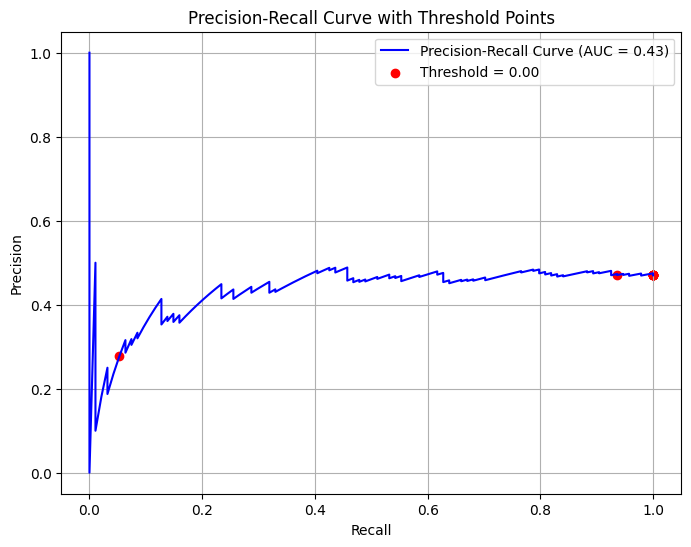

In [3]:
# Example usage:
# Assuming you have a trained model, test data (X_test, y_test), and a directory to save the plot
# Replace placeholders with your actual data and paths

# Build a simple binary classification model (replace this with your actual model)
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (replace this with your actual training process)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Specify the directory to save the plot
save_directory = "path/to/save/directory"

# Call the function to generate and save the precision-recall curve with threshold points
plot_precision_recall_curve(model, X_test, y_test, save_path=f"{save_directory}/precision_recall_curve_with_thresholds.png")